<a href="https://colab.research.google.com/github/emmigalfo/healthcare_nlp/blob/Emmigalfo/HealthChatEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install --upgrade wordcloud


In [19]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# I'm using google colab so I need to import drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Project-HealthcareNLPChat/medquad.csv')
df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


In [4]:

df.tail()

,question,answer,source,focus_area
16407,What is (are) Diabetic Neuropathies: The Nerve...,Focal neuropathy appears suddenly and affects ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16408,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16409,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16410,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
16411,What to do for Diabetic Neuropathies: The Nerv...,- Diabetic neuropathies are nerve disorders ca...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


In [5]:
df.describe()

,question,answer,source,focus_area
count,16412,16407,16412,16398
unique,14984,15817,9,5126
top,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,GHR,Breast Cancer
freq,20,348,5430,53


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


In [8]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16393 non-null  object
 1   answer      16393 non-null  object
 2   source      16393 non-null  object
 3   focus_area  16393 non-null  object
dtypes: object(4)
memory usage: 640.4+ KB


## Clean the text data:

* Remove punctuation and special characters.
* Convert all text to lowercase.
* Tokenize the text into individual words or phrases.
* Remove stop words

In [11]:
# Remove Punctuation and Special Characters:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


In [12]:
# Convert Text to Lowercase:
def to_lowercase(text):
    return text.lower()

In [15]:
# Tokenize Text:
def tokenize_text(text):
    return word_tokenize(text)

In [16]:
# Remove Stop Words:
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [17]:
# Combine functions for pre-processing
def preprocess_text(text):
    text = remove_punctuation(text)
    text = to_lowercase(text)
    tokens = tokenize_text(text)
    tokens = remove_stop_words(tokens)
    return tokens

In [42]:
sample_set = df.loc[:5]
sample_set

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
5,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...,NIHSeniorHealth,Glaucoma


In [43]:
columns = ['question', 'answer', 'source', 'focus_area']
def preprocess_dataset(df, columns):
    processed_df = df.copy()
    for column in columns:
        processed_df[column] = processed_df[column].apply(preprocess_text)
    return processed_df


In [44]:
test_df = preprocess_dataset(sample_set, columns)
test_df

,question,answer,source,focus_area
0,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]
1,"[causes, glaucoma]","[nearly, 27, million, people, glaucoma, leadin...",[nihseniorhealth],[glaucoma]
2,"[symptoms, glaucoma]","[symptoms, glaucoma, glaucoma, develop, one, e...",[nihseniorhealth],[glaucoma]
3,"[treatments, glaucoma]","[although, openangle, glaucoma, cured, usually...",[nihseniorhealth],[glaucoma]
4,[glaucoma],"[glaucoma, group, diseases, damage, eyes, opti...",[nihseniorhealth],[glaucoma]
5,[glaucoma],"[optic, nerve, bundle, 1, million, nerve, fibe...",[nihseniorhealth],[glaucoma]


## Explore the data:

* Calculate basic statistics, such as the number of documents, the number of tokens per document, and the frequency of each token.
* Visualize the data using tools such as word clouds, frequency plots, and scatterplots.
* Identify any patterns or trends in the data.

In [55]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

def number_of_documents(df):
    return len(df)

In [56]:
def tokens_per_document(df):
    return df.applymap(len)

In [57]:
def frequency_of_each_token(df):
    all_tokens = [token for column in df for tokens_list in df[column] for token in tokens_list]
    return Counter(all_tokens)

In [58]:
def generate_word_cloud(token_frequency):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_frequency)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [59]:
def plot_token_frequencies(token_frequency):
    freq_df = pd.DataFrame(token_frequency.most_common(20), columns=['Token', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Token', data=freq_df)
    plt.title('Top 20 Tokens by Frequency')
    plt.show()

In [60]:
def data_stats_and_vis(df):
    # Calculate basic statistics
    num_docs = number_of_documents(df)
    tokens_per_doc = tokens_per_document(df)
    token_frequency = frequency_of_each_token(df)

    print(f"Number of Documents: {num_docs}")
    print("Tokens per Document:")
    print(tokens_per_doc.describe())

    # Visualize data
    generate_word_cloud(token_frequency)
    plot_token_frequencies(token_frequency)

Number of Documents: 6
Tokens per Document:
       question      answer  source  focus_area
count  6.000000    6.000000     6.0         6.0
mean   1.500000  118.166667     1.0         1.0
std    0.547723   70.530608     0.0         0.0
min    1.000000   10.000000     1.0         1.0
25%    1.000000   73.250000     1.0         1.0
50%    1.500000  141.500000     1.0         1.0
75%    2.000000  171.500000     1.0         1.0
max    2.000000  184.000000     1.0         1.0


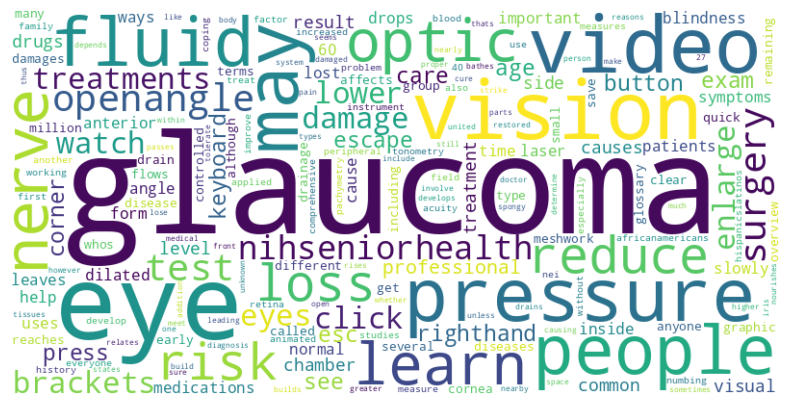

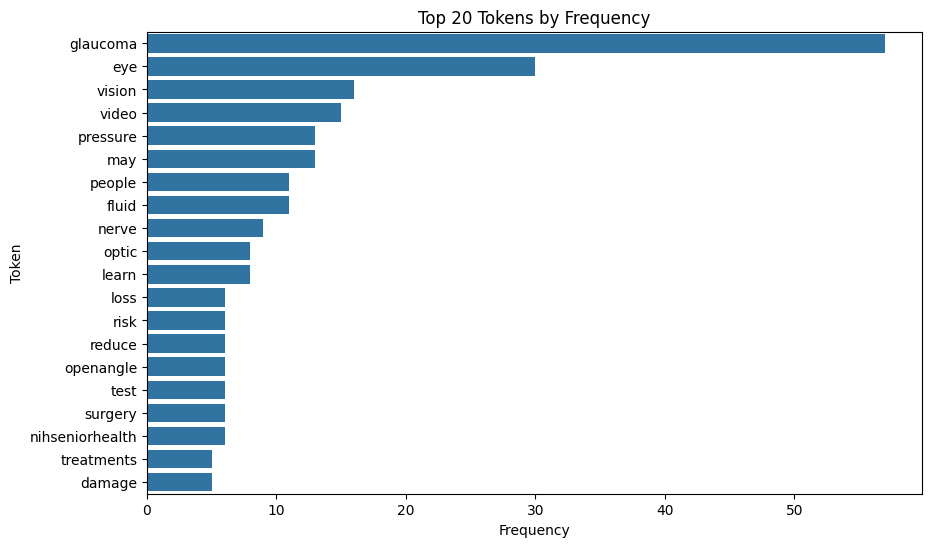

In [63]:
data_stats_and_vis(test_df)

## Extract features:

* Use techniques such as TF-IDF (Term Frequency - Inverse Document Frequency) to assign numerical values to each token based on its importance.
* Create a document-term matrix that summarizes the frequency of each token in each document.